In [1]:
# import commands

import pandas as pd
import numpy as np
from scripts import project_functions_gc as pfg
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

%matplotlib inline

#### Seaborn figure theme

In [2]:
sns.set_theme(style="darkgrid",
              font_scale=1.3,
              palette='Pastel2'
             )
plt.rc('axes.spines', top=False, right=False)

# Exploratory Data Analysis

#### Research questions
- Does providing more mental health resources improve employees' mental health in the tech industry?
- Is there a relationship between employees' mental health and their knowledge of the mental health resources available?

#### Variables in this dataset
- **family_history:** Do you have a family history of mental illness?
- **treatment:** Have you sought treatment for a mental health condition?
- **work_interfere:** If you have a mental health condition, do you feel that it interferes with your work?
- **benefits:** Does your employer provide mental health benefits?
- **care_options:** Do you know the options for mental health care your employer provides?
- **wellness_program:** Has your employer ever discussed mental health as part of an employee wellness program?
- **seek_help:** Does your employer provide resources to learn more about mental health issues and how to seek help?
- **condition:** Whether respondents have a mental health condition or not, based on their response to **work_interfere**

## Data loading and processing

In [3]:
mh0 = pfg.load_and_process('../../data/raw/mentalhealthintech.csv')
mh0

,family_history,treatment,work_interfere,benefits,care_options,wellness_program,seek_help,condition
0,Yes,Yes,Sometimes,1,1,2,2,Yes
1,No,Yes,Often,1,1,2,2,Yes
2,Yes,Yes,Rarely,1,0,0,1,Yes
3,No,No,N/A,0,0,2,0,No
4,Yes,Yes,Rarely,1,1,0,0,Yes
...,...,...,...,...,...,...,...,...
878,Yes,Yes,Sometimes,1,1,1,2,Yes
879,No,Yes,N/A,2,2,2,2,No
880,Yes,Yes,Often,1,1,2,2,Yes
881,Yes,Yes,Sometimes,1,1,2,2,Yes


In [4]:
# this filtered version of the dataset only contains respondents who indicated they have a mental health condition
mh_filtered_condition = mh0[mh0['work_interfere'].str.contains('N/A') == False].reset_index().drop('index', axis=1)
mh_filtered_condition

,family_history,treatment,work_interfere,benefits,care_options,wellness_program,seek_help,condition
0,Yes,Yes,Sometimes,1,1,2,2,Yes
1,No,Yes,Often,1,1,2,2,Yes
2,Yes,Yes,Rarely,1,0,0,1,Yes
3,Yes,Yes,Rarely,1,1,0,0,Yes
4,No,Yes,Sometimes,0,0,2,0,Yes
...,...,...,...,...,...,...,...,...
682,Yes,Yes,Sometimes,1,2,2,0,Yes
683,Yes,Yes,Sometimes,1,1,0,2,Yes
684,Yes,Yes,Sometimes,1,1,1,2,Yes
685,Yes,Yes,Often,1,1,2,2,Yes


## Overview of data

In [5]:
print(f'{mh0.shape[0]} rows, {mh0.shape[1]} columns')

883 rows, 8 columns


In [6]:
mh0.dtypes

family_history      object
treatment           object
work_interfere      object
benefits             int64
care_options         int64
wellness_program     int64
seek_help            int64
condition           object
dtype: object

In [7]:
mh0.describe(include=['object'])

,family_history,treatment,work_interfere,condition
count,883,883,883,883
unique,2,2,5,2
top,No,No,Sometimes,Yes
freq,551,447,328,687


## Pandas profiling

In [8]:
#ProfileReport(mh0).to_notebook_iframe()

**Pandas profiling observations and notes**
- Ignored the duplicate row warning because it doesn't seem like a big problem in the context of this dataset
- More people have sought treatment for mental health issues than people who haven't sought treatment.
- A reasonable number of employees seem to have knowledge about available mental health resources.

In [9]:
# sorted labels and dictionnaries
sorted_response_labels = ['Not sure', 'Yes', 'No']
sorted_freq_labels = ['Never', 'Rarely', 'Sometimes', 'Often']
sorted_yn_dict = {0:"Don't know", 1:'Yes', 2:'No'}

In [10]:
class display(object):
    # taken from class notes
    
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## "Measures" of mental health

In [11]:
# getting counts and relative frequencies
mh_condition = pfg.count_rel_freq_df(mh0, 'condition')

treatment = pfg.count_rel_freq_df(mh0,'treatment')

fam_hist = pfg.count_rel_freq_df(mh0,'family_history')

In [12]:
display('treatment', 'fam_hist', 'mh_condition')

,treatment,count,rel_freq
0,No,447,50.62
1,Yes,436,49.38
,family_history,count,rel_freq
0,No,551,62.4
1,Yes,332,37.6
,condition,count,rel_freq
0,Yes,687,77.8
1,No,196,22.2


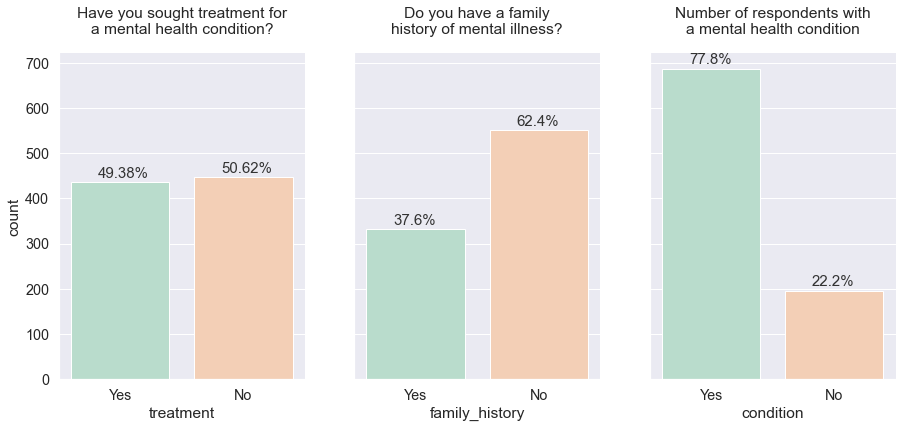

In [13]:
# references: https://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html
            # https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8
            # https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

fig, axes = plt.subplots(1,3, figsize=(15,6),sharey=True)

# plot 1: treatment
ax0 = sns.barplot(ax=axes[0], data=treatment, x='treatment', y='count', order=['Yes', 'No'])
pfg.rel_freq_label(ax0,0.22,10)
ax0.set_title('Have you sought treatment for\na mental health condition?', y=1.04)

# plot 2: family history
ax1 = sns.barplot(ax=axes[1], data=fam_hist, x='family_history', y='count', order=['Yes', 'No'])
pfg.rel_freq_label(ax1,0.22,10)
ax1.set_title('Do you have a family\nhistory of mental illness?', y=1.04)

# plot 3: whether they have a mental health condition or not
ax2 = sns.barplot(ax=axes[2], data=mh_condition, x='condition', y='count')
pfg.rel_freq_label(ax2,0.22,10)
ax2.set_title('Number of respondents with\na mental health condition', y=1.04)

for ax in axes.flat:
    ax.label_outer()

Text(0.5, 1.04, 'Whether respondents with/without a mental health\ncondition have a family history of mental illness')

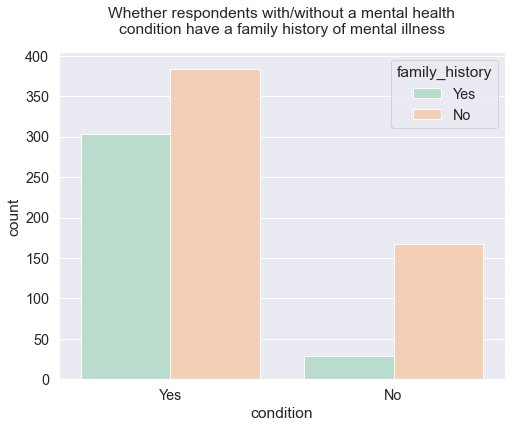

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(data=mh0, x='condition', hue='family_history')
plt.title('Whether respondents with/without a mental health\ncondition have a family history of mental illness', y=1.04)

- Number of people who have or have not sought treatment for mental health is split roughly into half, but remember that this does include people without a mental health condition.
- A significant number of respondents have a mental health condition (77.8%).
- Even though over half of respondents have sought treatment for a mental health condition, only a third of respondents have a family history of mental illness.
    - Of those who indicated a mental health condition, the number of those who have a family history of mental illness is less than those without a family history. This was surprising because mental health conditions are often inheritable.
    - Nonetheless, I don't see anything unusual with this; family history is a necessary precondition for having mental health issues.

## Seeking treatment

**condition + treatment**

In [15]:
# Reference: https://www.codeforests.com/2020/07/18/calculate-percentage-within-group/
cond_treatment_groups = (mh0.groupby(['condition', 'treatment'])
                           .count()
                           .loc[:, ['family_history']]
                           .rename(columns={'family_history':'count'})
                          )

pfg.rel_freq_within_grp(cond_treatment_groups)
pfg.make_relfreq_col(cond_treatment_groups)

cond_treatment_index = cond_treatment_groups.reset_index() # created a version with index reset so it's easier to plot

display('cond_treatment_groups', 'cond_treatment_index')

cond_treatment_groups
                     count  withingrp_relfreq  rel_freq
condition treatment                                    
No        No           193              98.47     21.86
          Yes            3               1.53      0.34
Yes       No           254              36.97     28.77
          Yes          433              63.03     49.04

cond_treatment_index
  condition treatment  count  withingrp_relfreq  rel_freq
0        No        No    193              98.47     21.86
1        No       Yes      3               1.53      0.34
2       Yes        No    254              36.97     28.77
3       Yes       Yes    433              63.03     49.04

Text(0.5, 1.01, 'Frequency of mental health conditions,\nby whether respondents have sought treatment')

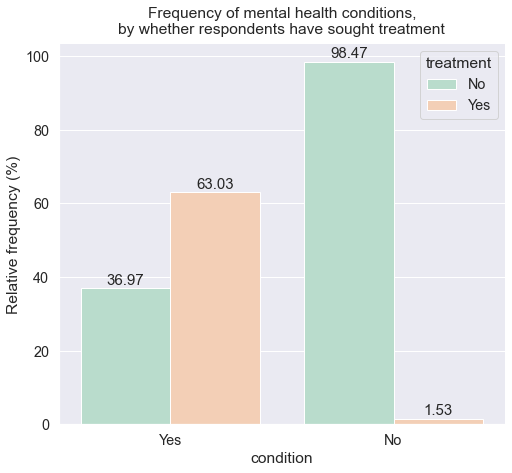

In [17]:
# Reference: https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/

fig, ax = plt.subplots(figsize=(8,7))
g = sns.barplot(data=cond_treatment_index, x='condition', y='withingrp_relfreq', hue='treatment', order=('Yes', 'No'))

for bar in g.patches:
    g.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.ylabel('Relative frequency (%)')
plt.title('Frequency of mental health conditions,\nby whether respondents have sought treatment', y=1.01)

- Out of the 687 people who indicated mental health issues, a little over half have sought treatment (63.03%).
- On the other hand, however, over a quarter of people with a mental health condition have not sought treatment (36.97%).
- Ignoring the "No" category because treatment status is not really significant in the context of that group of respondents. The difference between those who have/have not sought treatment in the group without a mental health condition is very large, so I am fairly certain there's not enough incorrect data (e.g., people indicate they don't have a mental health condition but say they have had treatment) to raise concerns.

**family_history + treatment**

In [18]:
hist_treatment_groups = (mh0.groupby(['family_history', 'treatment'])
                            .count()
                            .loc[:, ['work_interfere']]
                            .rename(columns={'work_interfere':'count'})
                          )

pfg.rel_freq_within_grp(hist_treatment_groups)
pfg.make_relfreq_col(hist_treatment_groups)

hist_treatment_index = hist_treatment_groups.reset_index() # created a version with index reset so it's easier to plot

display('hist_treatment_groups', 'hist_treatment_index')

hist_treatment_groups
                          count  withingrp_relfreq  rel_freq
family_history treatment                                    
No             No           364              66.06     41.22
               Yes          187              33.94     21.18
Yes            No            83              25.00      9.40
               Yes          249              75.00     28.20

hist_treatment_index
  family_history treatment  count  withingrp_relfreq  rel_freq
0             No        No    364              66.06     41.22
1             No       Yes    187              33.94     21.18
2            Yes        No     83              25.00      9.40
3            Yes       Yes    249              75.00     28.20

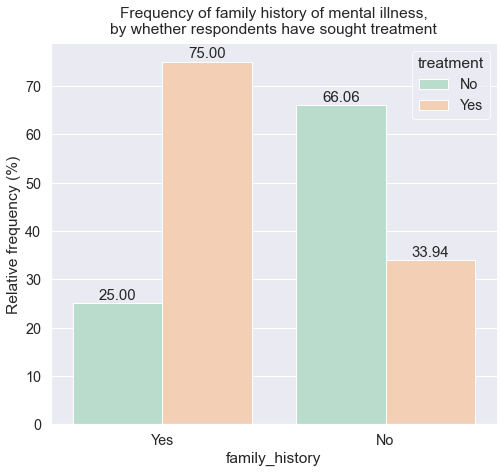

In [19]:
fig, ax = plt.subplots(figsize=(8,7))
g = sns.barplot(data=hist_treatment_index, x='family_history', y='withingrp_relfreq', hue='treatment', order=('Yes', 'No'))

for bar in g.patches:
    g.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.ylabel('Relative frequency (%)')
plt.title('Frequency of family history of mental illness,\nby whether respondents have sought treatment', y=1.01)
plt.legend(title='treatment', edgecolor='1')

- 75% of those with a family history of mental illness have sought treatment, more than those without a family history of mental illness.
- This might mean a number of things. For example, people with a family history of mental illness might not necessarily have mental health concerns themselves, which might be why they don't seek treatment. It's hard to judge the exact causes.

## Mental health interfering with work

In [20]:
# counts and relative frequencies

cond_interfere = pfg.count_rel_freq_df(mh_filtered_condition,'work_interfere') # this only includes people with a mental health condition
cond_interfere

treatment_interfere = mh_filtered_condition.groupby('treatment')['work_interfere'].value_counts().to_frame().rename(columns={'work_interfere':'count'})
pfg.rel_freq_within_grp(treatment_interfere)
pfg.make_relfreq_col(treatment_interfere)

treatment_interfere_index = treatment_interfere.reset_index()

display('cond_interfere', 'treatment_interfere', 'treatment_interfere_index')

cond_interfere
  work_interfere  count  rel_freq
0      Sometimes    328     47.74
1          Never    149     21.69
2         Rarely    124     18.05
3          Often     86     12.52

treatment_interfere
                          count  withingrp_relfreq  rel_freq
treatment work_interfere                                    
No        Never             127              50.00     18.49
          Sometimes          76              29.92     11.06
          Rarely             36              14.17      5.24
          Often              15               5.91      2.18
Yes       Sometimes         252              58.20     36.68
          Rarely             88              20.32     12.81
          Often              71              16.40     10.33
          Never              22               5.08      3.20

treatment_interfere_index
  treatment work_interfere  count  withingrp_relfreq  rel_freq
0        No          Never    127              50.00     18.49
1        No      Sometimes     76              29.92     11.06
2        No         Rarely     36              14.17      5.24
3        No          Often     15               5.91      2.18
4       Yes      Sometimes    252              58.20     36.68
5       Yes         Rarely     88              20.32     12.81
6       Yes          Often     71              16.40     10.33
7       Yes          Never     22               5.08      3.20

Text(0.5, 1.08, 'Frequency of mental health issues interfering with work\nfor those with a mental health condition')

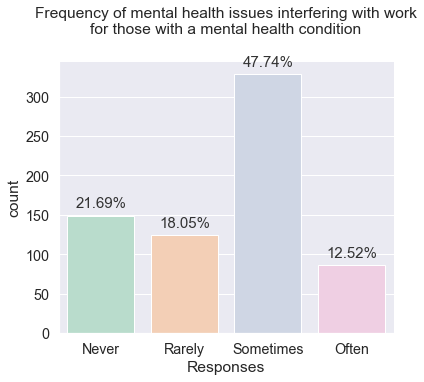

In [21]:
fig, ax = plt.subplots(figsize=(6,5))
g = sns.barplot(data=cond_interfere, x='work_interfere',y='count', order=sorted_freq_labels)

pfg.rel_freq_label(g,0.1,10)

plt.xlabel('Responses', y=0.9)
g.set_title('Frequency of mental health issues interfering with work\nfor those with a mental health condition', y=1.08)

Text(0.27, 1.1, 'Frequency of mental health interfering with work,\nfor those who have and have not sought treatment')

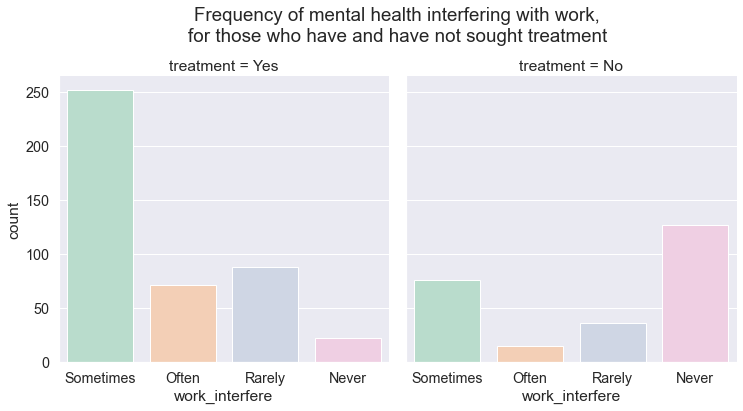

In [22]:
# Reference: https://seaborn.pydata.org/generated/seaborn.catplot.html

g = sns.catplot(x="work_interfere", col="treatment", col_wrap=4,
                data=mh_filtered_condition,
                kind="count", height=5, aspect=1, row_order=sorted_freq_labels,
                )
g.fig.suptitle('Frequency of mental health interfering with work,\nfor those who have and have not sought treatment', x=0.27, y=1.1, size='large')

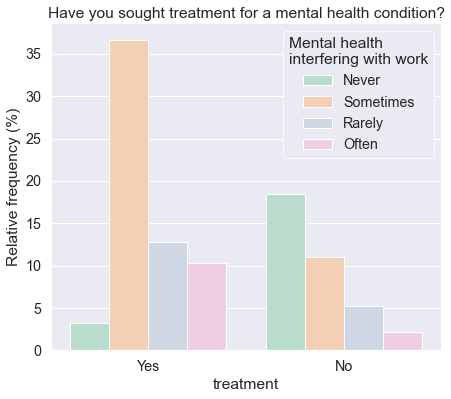

In [23]:
# another way to visualize work_interfere and treatment all at once

fig, ax = plt.subplots(figsize=(7,6))

g = sns.barplot(data=treatment_interfere_index, x='treatment', y='rel_freq', hue='work_interfere', order=['Yes', 'No'])

plt.title('Have you sought treatment for a mental health condition?')
plt.ylabel('Relative frequency (%)')
plt.legend(title='Mental health\ninterfering with work', edgecolor='1')

- Mental health interferes with work more often for people who have sought treatment for a mental health issue than for people who have not sought treatment for a mental health issue.
- For people with a mental health condition, almost half feel that it interferes with their work sometimes.
- Interestingly, however, almost a quarter feel that their mental health condition never interfere with their work.

## Focused Analysis
### Knowledge and provision of mental health resources + relationships with actual mental health

**Research questions:**
- Is there a relationship between providing more mental health resources and quality of employees' mental health in the tech industry?
- Is there a relationship between employees' mental health and their knowledge of the mental health resources available?

There was no question that directly asked about participants' mental health, so mental health was inferred based on whether participants judged the **work_interfere** question to be applicable to them. Data was grouped to give a count of those supposedly *with* a mental health condition (those who answered with anything but N/A) and those *without* a mental health condition (those who answered with N/A). This information is contained in the **condition** column, which tells us whether or not respondents might have a mental health condition.

The **work_interfere** variable can also be used as a rough proxy for the severity of mental health conditions among respondents. I say "rough" because the question ("If you have a mental health condition, do you feel that it interferes with your work?") only looks at the effects of mental health in the workplace, ignoring how it may manifest in other areas of one's life.

Additionally, the **treatment** variable can also tell us a little bit about the state of mental health among respondents, although it's necessary to point out that not everyone who faces mental health issues will seek out treatment for said issues. Thus, this variable is also merely a rough proxy. It also seems more appropriate to deem it as an indication of resources available to respondents.

Upon further consideration, the **family_history** variable does not tell us much about the frequency of mental health concerns, so I have decided to not use that variable, relying on **condition**, **treatment**, and **work_interfere** instead.

**knowledge_counts:** This is an aggregate of all the variables assessing both knowledge and provision of mental health resources. I am mainly looking at how many people answered with "Don't know," because it gives an idea of the state of knowledge of mental health resources.

In [24]:
knowledge = mh0[['benefits', 'care_options', 'wellness_program', 'seek_help']].melt().replace({2:'No', 1:'Yes', 0:"Don't know"})

knowledge_counts = pfg.count_rel_freq_df(knowledge, 'value').replace({2:'No', 1:'Yes', 0:"Don't know"})

display('knowledge', 'knowledge_counts')

,variable,value
0,benefits,Yes
1,benefits,Yes
2,benefits,Yes
3,benefits,Don't know
4,benefits,Yes
...,...,...
3527,seek_help,No
3528,seek_help,No
3529,seek_help,No
3530,seek_help,No


Text(0.5, 0, 'Responses')

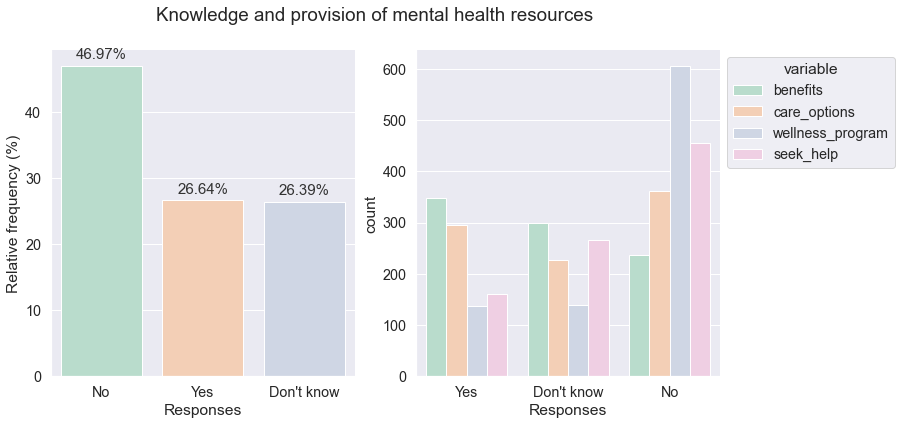

In [25]:
# Reference: https://stackoverflow.com/questions/51211538/pandas-seaborn-countplot-from-several-columns

fig, axes = plt.subplots(1,2, figsize=(12,6))
fig.suptitle('Knowledge and provision of mental health resources')

# 1st plot: without splitting into different questions
ax0 = sns.barplot(ax=axes[0], data=knowledge_counts, x='value', y='rel_freq')
ax0.set_ylabel('Relative frequency (%)')
ax0.set_xlabel('Responses')
pfg.rel_freq_label(ax0, 0.15,1)

# split into different questions
ax1 = sns.countplot(ax=axes[1], data=knowledge, x='value', hue='variable')
ax1.legend(title='variable', bbox_to_anchor=(1,1))
ax1.set_xlabel('Responses')

- Very few employers have ever discussed mental health as part of an employee wellness program.
- Not a lot of employers provide resources to learn more about mental health issues and seeking help.
- There seems to be a lot of uncertainty/lack of knowledge about mental health resources provided by employers.
- Out of the variables assessing knowledge and provision of mental health resources, participants stated that employers provide mental health benefits the most.
    - Additionally, the least provided "resource" is discussion of mental health as part of a wellness program.

**resource_provision**
This is an aggregate of columns assessing the status of just employer provision (not employees' knowledge) of resources for mental health. "Resources" includes mental health benefits, communication about mental health, and resources on whether to seek further information and help.

In [26]:
resource_provision_counts = (mh0[['benefits','wellness_program', 'seek_help']].melt()
                      .loc[:,['value']]
                      .value_counts()
                      .to_frame()
                      .reset_index()
                      .rename(columns={0:'count'})
                      .replace({2:'No', 1:'Yes', 0:"Don't know"})
                     )
                      
pfg.make_relfreq_col(resource_provision_counts)

resource_provision_counts

,value,count,rel_freq
0,No,1298,49.00
1,Don't know,705,26.61
2,Yes,646,24.39


Text(0.5, 0, 'Responses')

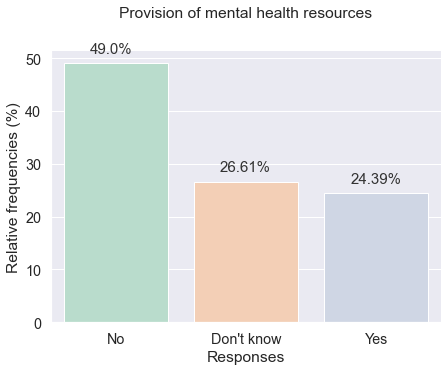

In [27]:
fig, ax = plt.subplots(figsize=(7,5))
g = sns.barplot(data=resource_provision_counts, x='value', y='rel_freq')
pfg.rel_freq_label(g,0.2,2)
plt.ylabel('Relative frequencies (%)')
plt.title('Provision of mental health resources', y=1.1)
plt.xlabel('Responses')

- The number of people who say that their employer does not provide mental health benefits is nearly half.

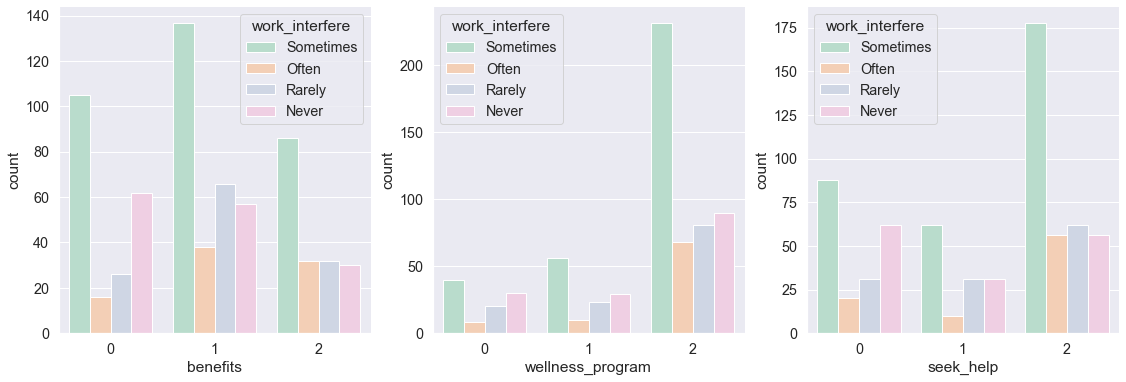

In [28]:
# Reference: https://stackoverflow.com/questions/12402561/how-to-set-font-size-of-matplotlib-axis-legend

fig, axes = plt.subplots(1,3, sharex=True, figsize=(19,6))

# plot 1: benefits
ax0 = sns.countplot(ax=axes[0], data=mh_filtered_condition, x='benefits', hue='work_interfere')


# g.set_xticklabels(sorted_response_labels)
# plt.xlabel('Responses') and plt.ylabel('Count')

# plt.title('Does your employer provide mental health benefits?', size=18, y=1.02)
# leg = plt.legend(title='Frequency of mental health\ninterfering with work', bbox_to_anchor=(1.2,1))
# leg._legend_box.align = "center"

# plot 2: wellness program
ax1 = sns.countplot(ax=axes[1], data=mh_filtered_condition, x='wellness_program', hue='work_interfere')

# plot 3: resources for information and seeking help
ax2 = sns.countplot(ax=axes[2], data=mh_filtered_condition, x='seek_help', hue='work_interfere')

## Discussion and conclusions

- Knowledge of what mental health resources are available seems to contribute to the improvement of handling mental health issues. Thus, employers might need to be more intentional about informing employees about the resources available.